In [5]:
!pip install catboost

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import catboost
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [7]:
df=pd.read_csv("titanic3.csv")

In [8]:
df.shape

(1309, 14)

In [9]:
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [10]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [11]:
df.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [12]:
df['embarked'] = df['embarked'].replace(np.NaN, 'Unknown')

In [13]:
df['cabin'] = df['cabin'].replace(np.NaN, 'U')
df['cabin'] = [ln[0] for ln in df['cabin'].values]
df['cabin'] = df['cabin'].replace('U', 'Unknown')

In [14]:
df["cabin"].isna()

0       False
1       False
2       False
3       False
4       False
        ...  
1304    False
1305    False
1306    False
1307    False
1308    False
Name: cabin, Length: 1309, dtype: bool

In [15]:
df['cabin'].head()

0    B
1    C
2    C
3    C
4    C
Name: cabin, dtype: object

In [16]:
df = df[[f for f in list(df) if f not in ['name', 'boat','body', 'ticket', 'home.dest']]]

In [17]:
lblenc=LabelEncoder()

df["sex"]=lblenc.fit_transform(df["sex"])

df["pclass"]=lblenc.fit_transform(df["pclass"])

<ipython-input-17-42efb274acd4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["sex"]=lblenc.fit_transform(df["sex"])
<ipython-input-17-42efb274acd4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pclass"]=lblenc.fit_transform(df["pclass"])


In [18]:
df['age']=df['age'].fillna(df['age'].mean())

<ipython-input-18-2f8578dfdb1e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['age']=df['age'].fillna(df['age'].mean())


In [19]:
df.isna().sum()

pclass      0
survived    0
sex         0
age         0
sibsp       0
parch       0
fare        1
cabin       0
embarked    0
dtype: int64

In [20]:
df=df.dropna()

In [21]:
df.shape

(1308, 9)

In [22]:
x=df.drop(labels="survived",axis=1)
y=df['survived']

In [23]:
features = [feat for feat in list(df) if feat != 'survived']
titanic_categories = np.where(df[features].dtypes != np.float)[0]

<ipython-input-23-bee2fd65c8cd>:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  titanic_categories = np.where(df[features].dtypes != np.float)[0]


In [24]:
X_train, X_test, y_train, y_test = train_test_split(df[features],
                                                    df[['survived']],
                                                    test_size=0.2,
                                                     random_state=0)

In [25]:
params = {'iterations':5000,
        'learning_rate':0.01,
        'cat_features':titanic_categories,
        'depth':3,
        'eval_metric':'AUC',
        'verbose':200,
        'od_type':"Iter",
        'od_wait':500,
        'random_seed': 0         }

In [26]:
cat_model = CatBoostClassifier(**params)
cat_model.fit(X_train, y_train,
          eval_set=(X_test, y_test),
          use_best_model=True,
          plot=True
         );

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	test: 0.8412152	best: 0.8412152 (0)	total: 13.4ms	remaining: 1m 6s
200:	test: 0.8476416	best: 0.8483181 (182)	total: 529ms	remaining: 12.6s
400:	test: 0.8516696	best: 0.8516696 (399)	total: 1.2s	remaining: 13.8s
600:	test: 0.8574811	best: 0.8574811 (600)	total: 1.89s	remaining: 13.8s
800:	test: 0.8592952	best: 0.8602792 (760)	total: 2.48s	remaining: 13s
1000:	test: 0.8597872	best: 0.8603407 (968)	total: 3.2s	remaining: 12.8s
1200:	test: 0.8589263	best: 0.8603407 (968)	total: 4.71s	remaining: 14.9s
1400:	test: 0.8578808	best: 0.8603407 (968)	total: 5.78s	remaining: 14.9s
Stopped by overfitting detector  (500 iterations wait)

bestTest = 0.8603406925
bestIteration = 968

Shrink model to first 969 iterations.


<Axes: >

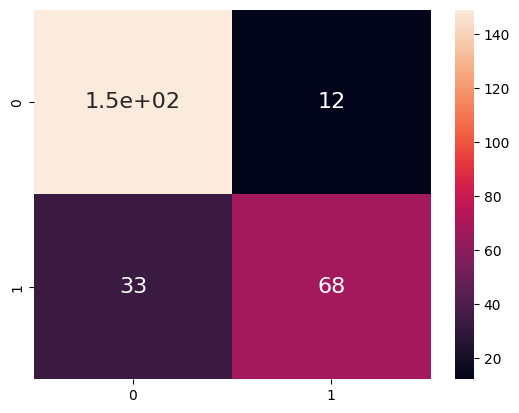

In [27]:
y_pred = cat_model.predict(X_test)
cm = confusion_matrix(y_test, [1 if p > 0.5 else 0 for p in y_pred])
plt.ticklabel_format( axis='y', useOffset=False)
sns.heatmap(cm, annot=True, annot_kws={"size": 16})

In [28]:
accuracy = accuracy_score(y_test, [1 if p > 0.5 else 0 for p in y_pred])

print("Accuracy:", accuracy)

Accuracy: 0.8282442748091603
